In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
cwd = '/Users/yingluwang/finalproject-train'
for dirname, _, filenames in os.walk(cwd):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/yingluwang/finalproject-train/.DS_Store
/Users/yingluwang/finalproject-train/house-price-predictor.ipynb
/Users/yingluwang/finalproject-train/train.csv
/Users/yingluwang/finalproject-train/.ipynb_checkpoints/house-price-predictor-checkpoint.ipynb


In [4]:
data = pd.read_csv('/Users/yingluwang/finalproject-train/train.csv')
data.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
data['ADDRESS'] = data['ADDRESS'].str.split(',').apply(lambda x: x[-1])

In [7]:
data['ADDRESS'].value_counts(ascending=False).head(25)

Bangalore        4340
Lalitpur         2993
Mumbai           2023
Pune             1991
Noida            1767
Kolkata          1709
Maharashtra      1579
Chennai          1255
Ghaziabad        1087
Jaipur            962
Chandigarh        696
Faridabad         649
Mohali            556
Vadodara          510
Gurgaon           430
Surat             423
Nagpur            336
Lucknow           327
Indore            306
Bhubaneswar       235
Bhopal            218
Kochi             205
Visakhapatnam     179
Bhiwadi           161
Coimbatore        149
Name: ADDRESS, dtype: int64

In [8]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'
    
data['city_tier'] = data['ADDRESS'].apply(map_city)

In [20]:
%matplotlib inline
data['area'] = np.log(data['SQUARE_FT'])
data['price'] = np.log(data['TARGET(PRICE_IN_LACS)'])


Text(0, 0.5, 'price')

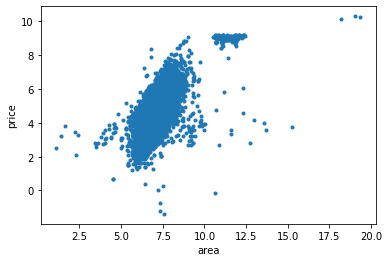

In [21]:
plt.plot(data['area'], data['price'],'.')
plt.xlabel('area')
plt.ylabel('price')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'price')

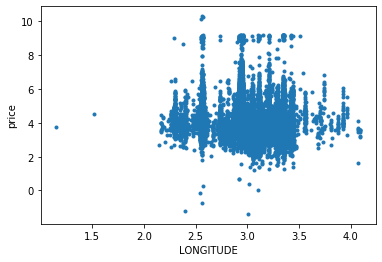

In [23]:
%matplotlib inline
#plt.figure(figsize=(15,12))
data['LONGITUDE'] = np.log(data['LONGITUDE'])
data['price'] = np.log(data['TARGET(PRICE_IN_LACS)'])

plt.plot(data['LONGITUDE'], data['price'],'.')
plt.xlabel('LONGITUDE')
plt.ylabel('price')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'price')

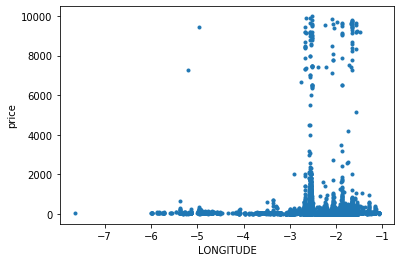

In [30]:
%matplotlib inline
#plt.figure(figsize=(15,12))
data['LONGITUDE'] = np.log(data['LONGITUDE'])
data['price'] = np.log(data['TARGET(PRICE_IN_LACS)'])

plt.plot(data['LONGITUDE'], data['TARGET(PRICE_IN_LACS)'],'.')
plt.xlabel('LONGITUDE')
plt.ylabel('price')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'price')

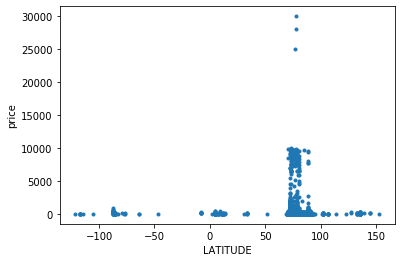

In [27]:
%matplotlib inline
#plt.figure(figsize=(15,12))
data['LATITUDEE'] = np.log(data['LATITUDE'])
#data['price'] = np.log(data['TARGET(PRICE_IN_LACS)'])

plt.plot(data['LATITUDE'], data['TARGET(PRICE_IN_LACS)'],'.')
plt.xlabel('LATITUDE')
plt.ylabel('price')

In [62]:
import random
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import axes
from matplotlib.font_manager import FontProperties


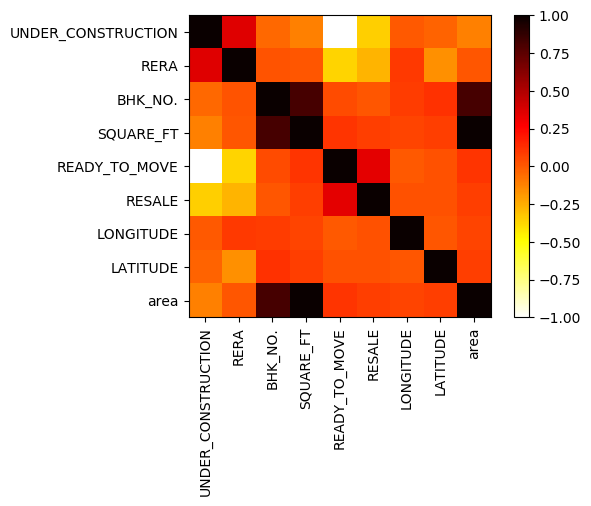

In [92]:
data = [[1,0.36,-0.04,-0.11, -1,-0.35,0, -0.03,-0.11],
       [0.36,1,0.02,0.01,-0.36,-0.27,0.1,-0.16,0.01],
       [-0.04,0.02,1,0.82,0.04,0.01,0.09,0.12,0.82],
       [-0.11,0.01,0.82,1,0.11,0.08,0.07,0.08,1],
       [-1,-0.36, 0.04, 0.11,1,0.35, 0,0.03, 0.11],
       [-0.35,-0.27, 0.01,0.08,0.35, 1, 0.03,0.03,0.08],
       [0,0.1,0.09,0.07,0,0.03,1,0.01,0.07],
       [-0.03,-0.16,0.12,0.08,0.03,0.03,0.01,1,0.08],
       [-0.11,0.01,0.82,1,0.11,0.08,0.07,0.08,1]]
xLabel = ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'area']
yLabel = ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'area']

data = np.array(data)
plt.figure(dpi=100)
plt.imshow(data, cmap=plt.cm.hot_r)
plt.xticks(ticks=np.arange(9),labels=xLabel,rotation=90)
plt.yticks(ticks=np.arange(9),labels=yLabel)
plt.colorbar()

In [192]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

In [193]:
from sklearn.neural_network import MLPRegressor
nnregr = MLPRegressor(random_state=1, max_iter=500)
nnregr.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=1)

In [194]:
y_pred = clf.predict(X_train)

print('Train metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_train1, np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train1, np.exp(y_pred))*100, 2))

y_pred = clf.predict(X_test)

print('Validation metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_test1,  np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Train metrics...
RMSE Actual:  4.233723173795017
RMSE Scaled Data:  0.035599495755662826
r2_score:  100.0
Validation metrics...
RMSE Actual:  227.34910803989482
RMSE Scaled Data:  0.4591797101922371
r2_score:  83.76


In [195]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred[-150:]))), y=np.exp(y_pred[-150:]),
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test1[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

In [196]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

In [197]:
from sklearn import linear_model
reg = linear_model.Lars(n_nonzero_coefs=1, normalize=False)
reg.fit(X_train, y_train)

Lars(n_nonzero_coefs=1, normalize=False)

In [198]:
y_pred = reg.predict(X_train)

print('Train metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_train1, np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train1, np.exp(y_pred))*100, 2))

y_pred = reg.predict(X_test)

print('Validation metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_test1,  np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Train metrics...
RMSE Actual:  682.4490716744458
RMSE Scaled Data:  0.900963765968651
r2_score:  -1.29
Validation metrics...
RMSE Actual:  568.2361669863207
RMSE Scaled Data:  0.8846485934513835
r2_score:  -1.48


In [199]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred[-150:]))), y=np.exp(y_pred[-150:]),
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test1[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

In [200]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

In [201]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [202]:
y_pred = regr.predict(X_train)

print('Train metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_train1, np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train1, np.exp(y_pred))*100, 2))

y_pred = regr.predict(X_test)

print('Validation metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_test1,  np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Train metrics...
RMSE Actual:  401.4707430644736
RMSE Scaled Data:  0.6703922837138395
r2_score:  64.95
Validation metrics...
RMSE Actual:  301.55902944934724
RMSE Scaled Data:  0.660846051486006
r2_score:  71.42


In [203]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred[-150:]))), y=np.exp(y_pred[-150:]),
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test1[-150:],
                         mode='lines',
                         name='True value'))

fig.show()

In [204]:
X = train_data[feature_cols]
y = train_data['PRICE_IN_LACS']

validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

y1 = train_data['TARGET(PRICE_IN_LACS)']
validation_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=validation_size, random_state=0, 
                                                    stratify=X[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])

In [205]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)

BayesianRidge()

In [206]:
y_pred = reg.predict(X_train)

print('Train metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_train1, np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('r2_score: ', round(r2_score(y_train1, np.exp(y_pred))*100, 2))

y_pred = reg.predict(X_test)

print('Validation metrics...')
# rmse on actual scaled values
print('RMSE Actual: ', np.sqrt(mean_squared_error(y_test1,  np.exp(y_pred))))
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', round(r2_score(y_test1, np.exp(y_pred))*100, 2))

Train metrics...
RMSE Actual:  10040.562031401529
RMSE Scaled Data:  0.577036048391004
r2_score:  -21825.75
Validation metrics...
RMSE Actual:  392.6859765013736
RMSE Scaled Data:  0.5679629380144947
r2_score:  51.54


In [207]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_pred[-150:]))), y=np.exp(y_pred[-150:]),
                         mode='lines',
                         name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test[-150:]))), y=y_test1[-150:],
                         mode='lines',
                         name='True value'))

fig.show()